# Homework 6

Submitted by: Vinit Horakeri 

Date: 11/09/2021

In [127]:
%matplotlib inline

import pandas as pd
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt 
pd.options.display.max_columns = None

In [128]:
#Loading dataset into Jupyter environment - a security warning will appear. You can ignore it.
url_busdata="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/BusActivity_SY30_2019.csv"
csvbusdata=requests.get(url_busdata,verify=False).text  #this will generate a warning but you can proceed

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [129]:
#Loading Syracuse Weather dataset into Jupyter environment - a security warning will appear. You can ignore it.
url_weatherdata="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/syracuse_2019_weather.csv"
csvweatherdata=requests.get(url_weatherdata,verify=False).text  #this will generate a warning but you can proceed

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [130]:
#Setup the bus_activity dataframe with the data from the dataset correctly formatted. 
#You still need to set the column that will be the index
bus_activity=pd.read_csv(StringIO(csvbusdata))

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [131]:
#Setup the bus_activity dataframe with the data from the dataset correctly formatted. 
#You still need to set the column that will be the index
weather_2019=pd.read_csv(StringIO(csvweatherdata))

In [132]:
bus_activity.head()

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,SURVEY_DATE,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,TIME_PERIOD,SERVICE_PERIOD,TRIP_NUMBER,TRIP_KEY,BLOCK_NUMBER,BLOCK_KEY,BLOCK_NAME,RUN_NUMBER,RUN_KEY,VEHICLE_NUMBER,VEHICLE_DESCRIPTION,VEHICLE_SEATS,GARAGE_NAME,DIVISION_NAME,OPERATOR_ID,COMMENTS,SORT_ORDER,STOP_ID,MAIN_CROSS_STREET,TRAVEL_DIRECTION,TIMEPOINT,SEGMENT_MILES,TIME_SCHEDULED,TIME_ACTUAL_ARRIVE,TIME_ACTUAL_DEPART,DWELL_TIME,RUNNING_TIME_ACTUAL,PASSENGERS_ON,PASSENGERS_OFF,PASSENGERS_IN,WHEELCHAIRS,TIMEPOINT_MILES,FIRST_LAST_STOP,MODIFIED,UNIQUE_ID,stop_lat,stop_lon
0,2604506,298,Sep18 (Weekday),2019-01-02 00:00:00.000,180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,2017 Gillig G27D102N4 40 Ft,38,GAR-SYR,Syracuse and SU,2958,Trip starts at 5:27am at EOL330S and ends at ...,600,17203,DeWitt Wegmans Park-N-Ride,N,0,0.167,2019-01-02 05:27:00.000,2019-01-02 05:25:55.000,2019-01-02 05:25:55.000,NaN,2.05,0,0,0,0,0.941,1,1,33600000002,43.031959,-76.050541
1,2604506,298,Sep18 (Weekday),2019-01-02 00:00:00.000,180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,2017 Gillig G27D102N4 40 Ft,38,GAR-SYR,Syracuse and SU,2958,Trip starts at 5:27am at EOL330S and ends at ...,700,2292,E Genesee St/Kittell Rd,W,0,0.581,NaN,2019-01-02 05:30:22.000,2019-01-02 05:30:22.000,0.0,NaN,0,0,0,0,NaN,2,0,33600000003,43.031471,-76.053133
2,2604506,298,Sep18 (Weekday),2019-01-02 00:00:00.000,180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,2017 Gillig G27D102N4 40 Ft,38,GAR-SYR,Syracuse and SU,2958,Trip starts at 5:27am at EOL330S and ends at ...,800,1769,Erie Blvd E/E Genesee St,W,0,0.193,NaN,2019-01-02 05:31:22.000,2019-01-02 05:31:22.000,0.0,NaN,0,0,0,0,NaN,2,0,33600000004,43.034476,-76.063822
3,2604506,298,Sep18 (Weekday),2019-01-02 00:00:00.000,180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,2017 Gillig G27D102N4 40 Ft,38,GAR-SYR,Syracuse and SU,2958,Trip starts at 5:27am at EOL330S and ends at ...,1000,1772,E Genesee St/Jamesville Rd,W,0,0.165,2019-01-02 05:30:00.000,2019-01-02 05:31:49.000,2019-01-02 05:31:49.000,0.0,8.25,0,0,0,0,2.822,2,1,33600000006,43.035233,-76.067472
4,2604506,298,Sep18 (Weekday),2019-01-02 00:00:00.000,180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,2017 Gillig G27D102N4 40 Ft,38,GAR-SYR,Syracuse and SU,2958,Trip starts at 5:27am at EOL330S and ends at ...,1100,2274,E Genesee St/Orvilton Dr,W,0,0.076,NaN,2019-01-02 05:32:12.000,2019-01-02 05:32:12.000,0.0,NaN,0,0,0,0,NaN,2,0,33600000007,43.035846,-76.070604


In [133]:
bus_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363858 entries, 0 to 363857
Data columns (total 47 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SERIAL_NUMBER        363858 non-null  int64  
 1   SCHEDULE_ID          363858 non-null  int64  
 2   SCHEDULE_NAME        363858 non-null  object 
 3   SURVEY_DATE          363858 non-null  object 
 4   PATTERN_ID           363858 non-null  int64  
 5   ROUTE_NUMBER         363858 non-null  int64  
 6   ROUTE_NAME           363858 non-null  object 
 7   DIRECTION_NAME       363858 non-null  object 
 8   BRANCH               363858 non-null  object 
 9   TRIP_START_TIME      363858 non-null  object 
 10  TIME_PERIOD          363858 non-null  object 
 11  SERVICE_PERIOD       363858 non-null  object 
 12  TRIP_NUMBER          363858 non-null  int64  
 13  TRIP_KEY             363858 non-null  int64  
 14  BLOCK_NUMBER         363858 non-null  int64  
 15  BLOCK_KEY        

In [134]:
weather_2019.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
0,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/1/2019,15.66,0.02,0.0,40,53,21
1,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/2/2019,5.14,0.00,0.0,24,31,18
2,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/3/2019,10.74,0.09,0.3,33,37,30
3,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/4/2019,4.70,0.00,0.0,36,49,25
4,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/5/2019,5.59,0.00,0.0,33,44,25


In [135]:
#Drop some columns that won't be needed
bus_activity.drop(['SURVEY_DATE','VEHICLE_DESCRIPTION','GARAGE_NAME','DIVISION_NAME','COMMENTS','WHEELCHAIRS','SORT_ORDER','MODIFIED'],axis=1,inplace=True)

In [136]:
bus_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363858 entries, 0 to 363857
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SERIAL_NUMBER        363858 non-null  int64  
 1   SCHEDULE_ID          363858 non-null  int64  
 2   SCHEDULE_NAME        363858 non-null  object 
 3   PATTERN_ID           363858 non-null  int64  
 4   ROUTE_NUMBER         363858 non-null  int64  
 5   ROUTE_NAME           363858 non-null  object 
 6   DIRECTION_NAME       363858 non-null  object 
 7   BRANCH               363858 non-null  object 
 8   TRIP_START_TIME      363858 non-null  object 
 9   TIME_PERIOD          363858 non-null  object 
 10  SERVICE_PERIOD       363858 non-null  object 
 11  TRIP_NUMBER          363858 non-null  int64  
 12  TRIP_KEY             363858 non-null  int64  
 13  BLOCK_NUMBER         363858 non-null  int64  
 14  BLOCK_KEY            363858 non-null  int64  
 15  BLOCK_NAME       

In [137]:
bus_activity.head(5)

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,TIME_PERIOD,SERVICE_PERIOD,TRIP_NUMBER,TRIP_KEY,BLOCK_NUMBER,BLOCK_KEY,BLOCK_NAME,RUN_NUMBER,RUN_KEY,VEHICLE_NUMBER,VEHICLE_SEATS,OPERATOR_ID,STOP_ID,MAIN_CROSS_STREET,TRAVEL_DIRECTION,TIMEPOINT,SEGMENT_MILES,TIME_SCHEDULED,TIME_ACTUAL_ARRIVE,TIME_ACTUAL_DEPART,DWELL_TIME,RUNNING_TIME_ACTUAL,PASSENGERS_ON,PASSENGERS_OFF,PASSENGERS_IN,TIMEPOINT_MILES,FIRST_LAST_STOP,UNIQUE_ID,stop_lat,stop_lon
0,2604506,298,Sep18 (Weekday),180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,38,2958,17203,DeWitt Wegmans Park-N-Ride,N,0,0.167,2019-01-02 05:27:00.000,2019-01-02 05:25:55.000,2019-01-02 05:25:55.000,NaN,2.05,0,0,0,0.941,1,33600000002,43.031959,-76.050541
1,2604506,298,Sep18 (Weekday),180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,38,2958,2292,E Genesee St/Kittell Rd,W,0,0.581,NaN,2019-01-02 05:30:22.000,2019-01-02 05:30:22.000,0.0,NaN,0,0,0,NaN,2,33600000003,43.031471,-76.053133
2,2604506,298,Sep18 (Weekday),180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,38,2958,1769,Erie Blvd E/E Genesee St,W,0,0.193,NaN,2019-01-02 05:31:22.000,2019-01-02 05:31:22.000,0.0,NaN,0,0,0,NaN,2,33600000004,43.034476,-76.063822
3,2604506,298,Sep18 (Weekday),180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,38,2958,1772,E Genesee St/Jamesville Rd,W,0,0.165,2019-01-02 05:30:00.000,2019-01-02 05:31:49.000,2019-01-02 05:31:49.000,0.0,8.25,0,0,0,2.822,2,33600000006,43.035233,-76.067472
4,2604506,298,Sep18 (Weekday),180900565,336,SY30,TO HUB,[Sy30]Inbound 330,2019-01-02 05:27:00.000,AM Early,Weekday,1,1098034,34302,301,3011 SYR,205,205,1752,38,2958,2274,E Genesee St/Orvilton Dr,W,0,0.076,NaN,2019-01-02 05:32:12.000,2019-01-02 05:32:12.000,0.0,NaN,0,0,0,NaN,2,33600000007,43.035846,-76.070604


#### Checking data types of each column in the dataframe.

In [138]:
bus_activity.dtypes 

SERIAL_NUMBER            int64
SCHEDULE_ID              int64
SCHEDULE_NAME           object
PATTERN_ID               int64
ROUTE_NUMBER             int64
ROUTE_NAME              object
DIRECTION_NAME          object
BRANCH                  object
TRIP_START_TIME         object
TIME_PERIOD             object
SERVICE_PERIOD          object
TRIP_NUMBER              int64
TRIP_KEY                 int64
BLOCK_NUMBER             int64
BLOCK_KEY                int64
BLOCK_NAME              object
RUN_NUMBER               int64
RUN_KEY                  int64
VEHICLE_NUMBER           int64
VEHICLE_SEATS            int64
OPERATOR_ID              int64
STOP_ID                  int64
MAIN_CROSS_STREET       object
TRAVEL_DIRECTION        object
TIMEPOINT                int64
SEGMENT_MILES          float64
TIME_SCHEDULED          object
TIME_ACTUAL_ARRIVE      object
TIME_ACTUAL_DEPART      object
DWELL_TIME             float64
RUNNING_TIME_ACTUAL    float64
PASSENGERS_ON            int64
PASSENGE

In [139]:
bus_activity.shape

(363858, 39)

### checking for null values in the df

In [140]:
print('Checking if there are any null values in the Data',bus_activity.isnull().sum())


Checking if there are any null values in the Data SERIAL_NUMBER               0
SCHEDULE_ID                 0
SCHEDULE_NAME               0
PATTERN_ID                  0
ROUTE_NUMBER                0
ROUTE_NAME                  0
DIRECTION_NAME              0
BRANCH                      0
TRIP_START_TIME             0
TIME_PERIOD                 0
SERVICE_PERIOD              0
TRIP_NUMBER                 0
TRIP_KEY                    0
BLOCK_NUMBER                0
BLOCK_KEY                   0
BLOCK_NAME                  0
RUN_NUMBER                  0
RUN_KEY                     0
VEHICLE_NUMBER              0
VEHICLE_SEATS               0
OPERATOR_ID                 0
STOP_ID                     0
MAIN_CROSS_STREET           0
TRAVEL_DIRECTION            0
TIMEPOINT                   0
SEGMENT_MILES               0
TIME_SCHEDULED         310470
TIME_ACTUAL_ARRIVE          0
TIME_ACTUAL_DEPART          0
DWELL_TIME              15320
RUNNING_TIME_ACTUAL    317476
PASSENGERS_ON       

### There are 310470 null values in TIME_SCHEDULED, DWELL_TIME - > 15320, RUNNING_TIME_ACTUAL-> 317476 and TIMEPOINT_MILES 312681

#### Converting the Object date field to datetime

In [141]:
bus_activity['TRIP_START_TIME'] = pd.to_datetime(bus_activity['TRIP_START_TIME'])

#### fetching only the YYYY-DD-MM from datetime field

In [142]:
bus_activity['TRIP_START_TIME_YYYY_DD_MM'] = bus_activity['TRIP_START_TIME'].dt.date
## creating a new column in the df with only YYYY-DD-MM 


In [143]:
#Converting the Object date field to datetime
bus_activity['TRIP_START_TIME_YYYY_DD_MM'] = pd.to_datetime(bus_activity['TRIP_START_TIME_YYYY_DD_MM'])

### Daily count of number of bus trips of SY30

In [144]:
day_count = bus_activity['TRIP_START_TIME_YYYY_DD_MM'].value_counts()

In [145]:
# there are 365 rows in day_count series, lets just check top 20 largest number of trips
day_count.nlargest(20)

2019-07-01    1568
2019-07-19    1568
2019-10-03    1568
2019-09-26    1568
2019-02-20    1568
2019-02-21    1568
2019-09-19    1568
2019-09-18    1568
2019-02-27    1568
2019-08-01    1568
2019-03-14    1568
2019-07-30    1568
2019-03-25    1568
2019-10-21    1568
2019-03-28    1568
2019-06-06    1568
2019-04-17    1568
2019-04-18    1568
2019-04-23    1568
2019-04-26    1568
Name: TRIP_START_TIME_YYYY_DD_MM, dtype: int64

In [146]:
# there are 365 rows in day_count series, lets just check top 20 smallest number of trips

day_count.nsmallest(20)

2019-06-19     707
2019-07-11    1008
2019-08-09    1047
2019-02-19    1048
2019-04-30    1081
2019-05-06    1101
2019-06-12    1103
2019-01-18    1129
2019-03-05    1136
2019-11-05    1154
2019-06-17    1173
2019-07-16    1177
2019-10-25    1177
2019-04-24    1179
2019-02-22    1180
2019-09-25    1181
2019-01-02    1183
2019-08-19    1190
2019-04-16    1191
2019-11-22    1195
Name: TRIP_START_TIME_YYYY_DD_MM, dtype: int64

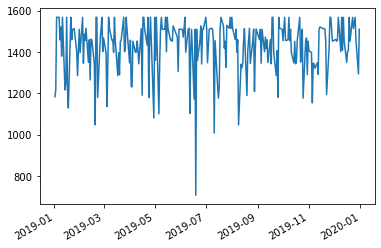

In [147]:
day_count.plot.line()


plt.show()

### the lowest number of trips was on 2019-06-19 is 707 which is just 50% of the highest number of trips (1568)


### Monthly analysis of number of trips

In [148]:
## creating a calculated column with just MM part of the date
bus_activity['TRIP_START_TIME_MM'] = bus_activity['TRIP_START_TIME'].dt.month


In [149]:
bus_activity['TRIP_START_TIME_MM']

0          1
1          1
2          1
3          1
4          1
          ..
363853    12
363854    12
363855    12
363856    12
363857    12
Name: TRIP_START_TIME_MM, Length: 363858, dtype: int64

In [150]:
month_count = bus_activity['TRIP_START_TIME_MM'].value_counts()

In [151]:
month_count

10    32999
5     32307
7     31457
1     31003
8     30945
12    30891
4     30583
3     30074
9     28723
2     28413
11    28347
6     28116
Name: TRIP_START_TIME_MM, dtype: int64

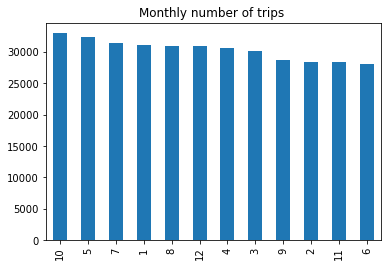

In [152]:
month_count.plot.bar()

plt.title("Monthly number of trips ")
plt.show()

### The highest number of bus trips were in the month of october, followed by may and least were in the month of june

### Passenger count analysis by date

In [153]:
c = bus_activity.groupby(['TRIP_START_TIME_MM', 'PASSENGERS_ON']).size()

In [154]:
TRIP_START_TIME_MM = bus_activity['TRIP_START_TIME_MM']
df1 = bus_activity.groupby(TRIP_START_TIME_MM)['PASSENGERS_ON'].sum()

In [155]:
df1

TRIP_START_TIME_MM
1     11475
2     12424
3     12251
4     12189
5     10263
6      7848
7      7581
8      9557
9     10851
10    12333
11     9529
12     7704
Name: PASSENGERS_ON, dtype: int64

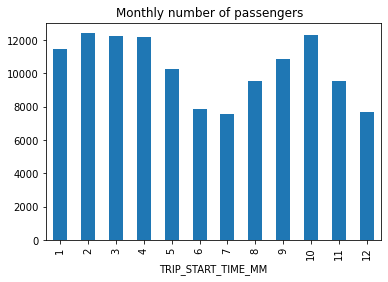

In [156]:
df1.plot.bar()

plt.title("Monthly number of passengers  ")

plt.show()

### The highest number of passengers carried by SY30 was in the month of Febraury followed by October and  Lowest passenger count is in July and december

### Finding correlation within the columns of bus_activity dataframe alone.

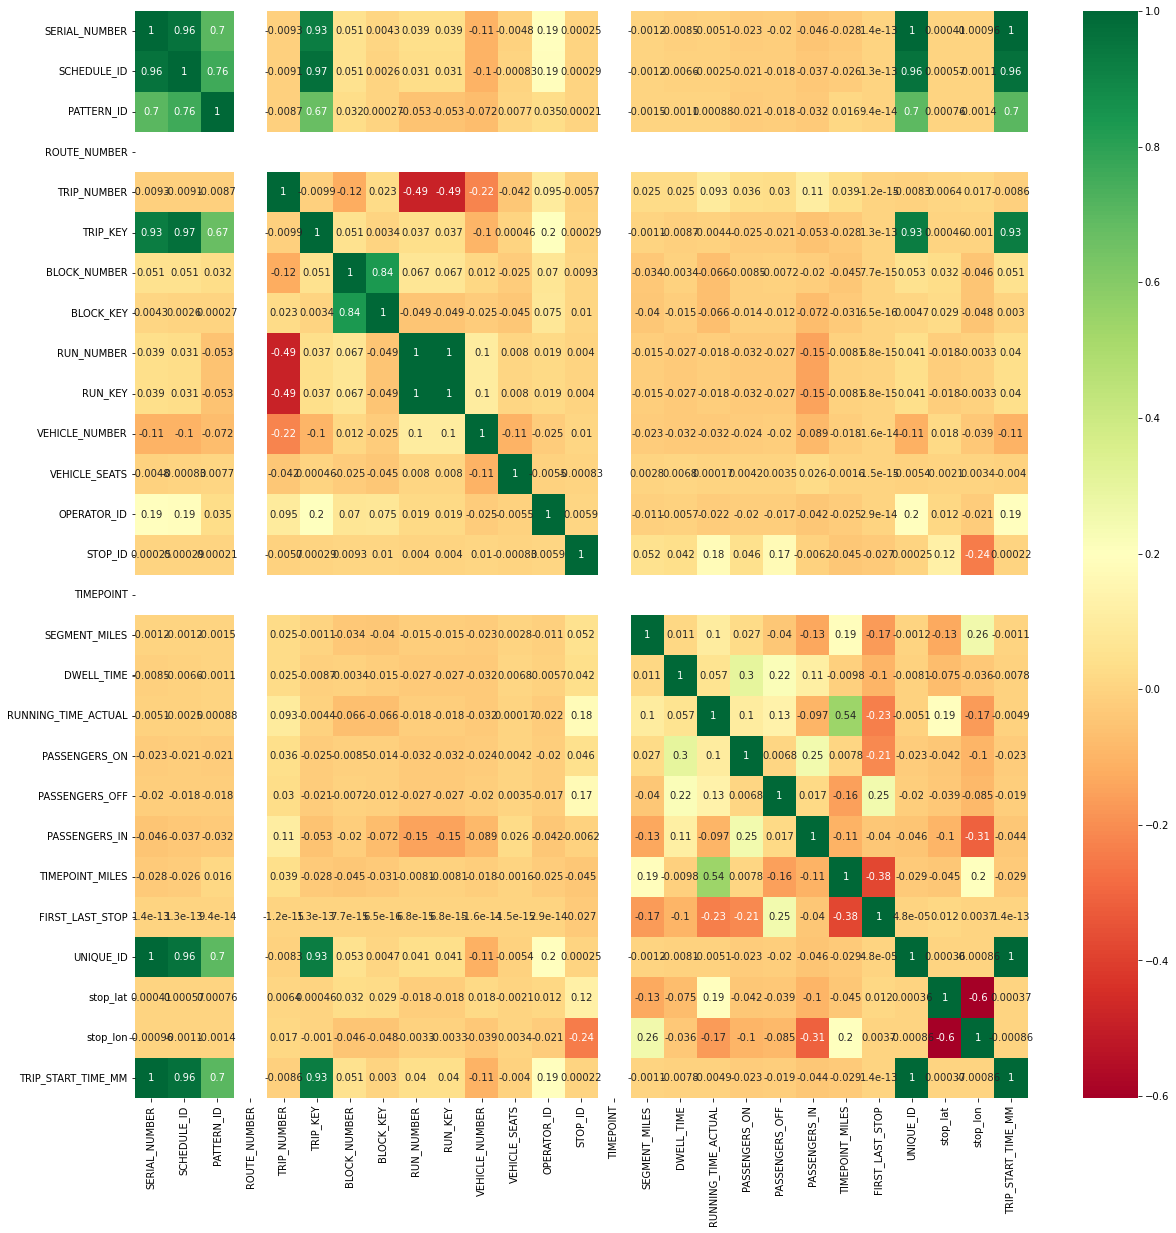

In [157]:
#correlation heatmap
import seaborn as sns
corrmat = bus_activity.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(bus_activity[top_corr_features].corr(),annot=True,cmap='RdYlGn')

### There are alot of columns that are highly correlated to each other, all the green cells indicate a high correlation between the two fields. Let's only focus on Passengers_on and Date of trip field.

### Passenger_on field is highly correlated with dwell_time, running_time_Actual, passengers in and is first_last_stop

### Now let's look at the weather dataset

In [158]:
## datatype of columns in weather dataset
weather_2019.dtypes

STATION     object
NAME        object
DATE        object
AWND       float64
PRCP       float64
SNOW       float64
TAVG         int64
TMAX         int64
TMIN         int64
dtype: object

In [159]:
#Converting the Object date field to datetime

weather_2019['DATE'] = pd.to_datetime(weather_2019['DATE'])

In [160]:
## fetching only the MM part from datetime
weather_2019['DATE_MM'] = weather_2019['DATE'].dt.month


In [161]:
weather_2019['DATE_MM']

0       1
1       1
2       1
3       1
4       1
       ..
360    12
361    12
362    12
363    12
364    12
Name: DATE_MM, Length: 365, dtype: int64

In [162]:
### Correlation of Weather dataset alone

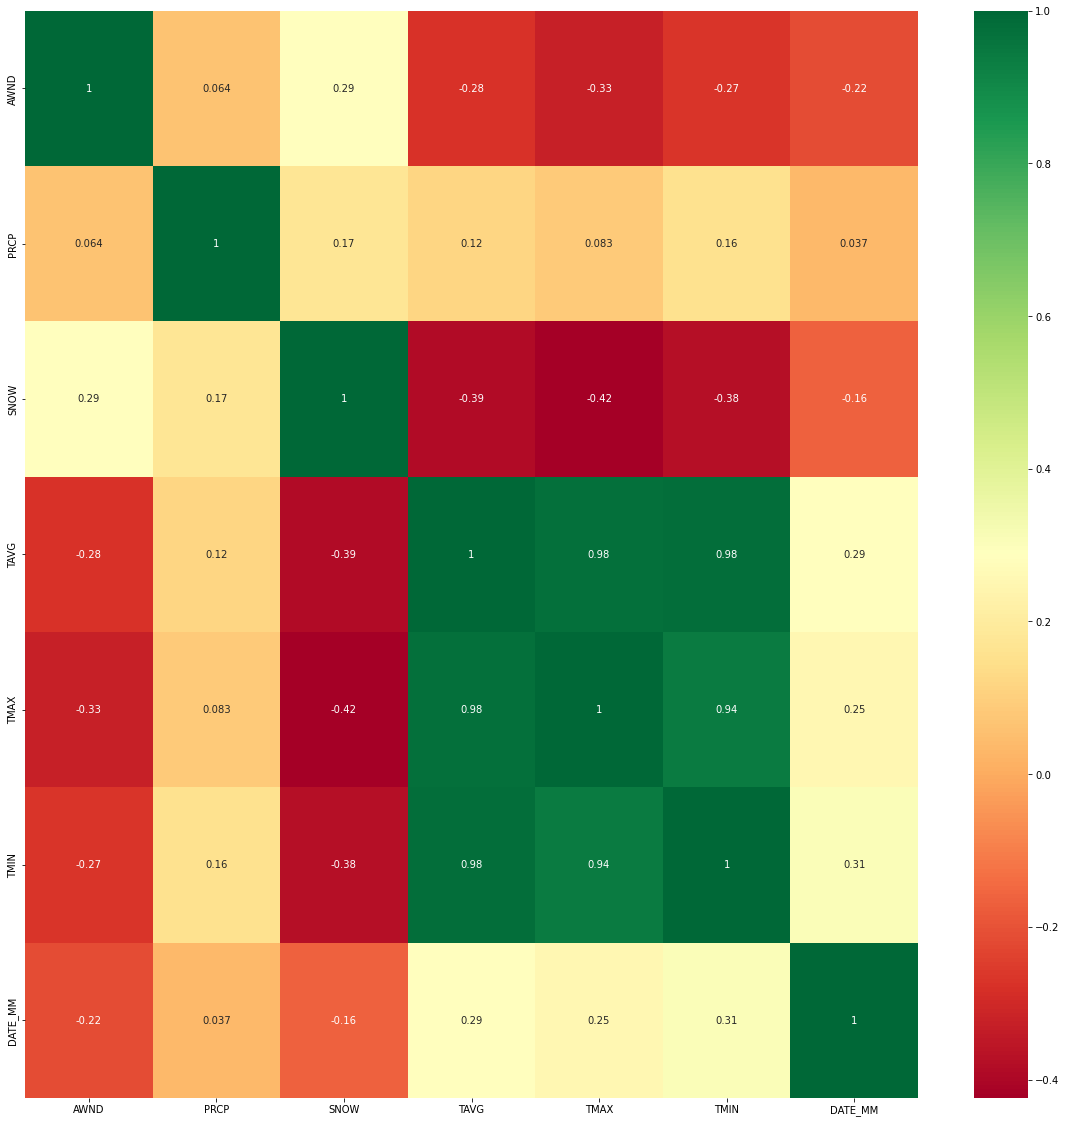

In [163]:
#correlation heatmap
import seaborn as sns
corrmat = weather_2019.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(weather_2019[top_corr_features].corr(),annot=True,cmap='RdYlGn')

### Expected analysis, Snow is inversely related to temperature. PRCP has slight correlation to Snow.

### finding average temperature monthly 

In [164]:
DATE_MM = weather_2019['DATE_MM']
df1 = weather_2019.groupby(DATE_MM)['TAVG'].mean()

In [165]:
df1

DATE_MM
1     21.677419
2     26.071429
3     32.483871
4     47.866667
5     56.838710
6     66.633333
7     74.741935
8     69.548387
9     64.033333
10    53.451613
11    36.466667
12    30.709677
Name: TAVG, dtype: float64

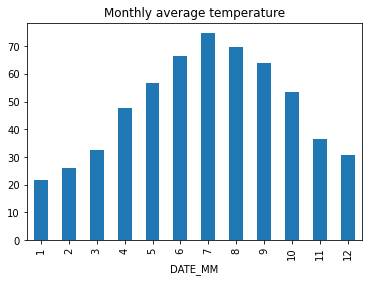

In [166]:
df1.plot.bar()

plt.title("Monthly average temperature")

plt.show()

### average temp is highest in July followed by August and June. Lowest in the month of Jan, Dec and Feb

### finding average Snow monthly 


In [167]:
DATE_MM = weather_2019['DATE_MM']
df2 = weather_2019.groupby(DATE_MM)['SNOW'].mean()

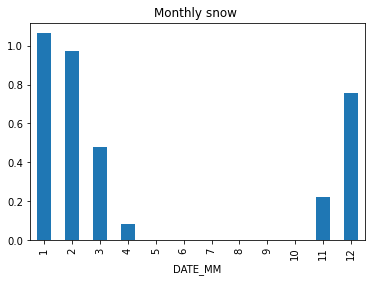

In [168]:
df2.plot.bar()
plt.title("Monthly snow ")


plt.show()

### finding average precipitation monthly 


In [169]:
DATE_MM = weather_2019['DATE_MM']
df2 = weather_2019.groupby(DATE_MM)['PRCP'].mean()

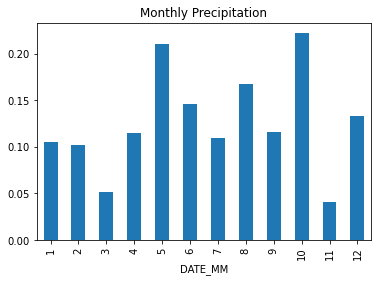

In [170]:
df2.plot.bar()
plt.title("Monthly Precipitation")


plt.show()

## Additional Analysis

### Weekday, Weekend analysis of bus activity

In [171]:
SERVICE_PERIOD = bus_activity['SERVICE_PERIOD']
df2 = bus_activity.groupby(SERVICE_PERIOD)['PASSENGERS_ON'].sum()

In [172]:
df2

SERVICE_PERIOD
Weekday    124005
Name: PASSENGERS_ON, dtype: int64

### all the buses were during weekday only in the year of 2019

### Time Period analysis AM/PM/MID day

In [173]:

TIME_PERIOD = bus_activity['TIME_PERIOD']
df3 = bus_activity.groupby(TIME_PERIOD)['PASSENGERS_ON'].sum()

In [174]:
df3

TIME_PERIOD
AM Early     1019
AM Peak     24318
Midday      60435
PM Late      4624
PM Peak     33609
Name: PASSENGERS_ON, dtype: int64

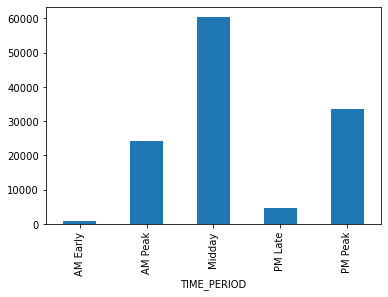

In [175]:
df3.plot.bar()


plt.show()

### most of the passenger count is in MID day and least in AM early and pm late.

### Stop wise analysis

In [176]:
STOP_ID = bus_activity['STOP_ID']
df4 = bus_activity.groupby(STOP_ID)['PASSENGERS_ON'].sum()

In [177]:
df4.nlargest() ## stops with highest passenger count

STOP_ID
17641    17060
1683     12351
5841     10334
5821      9688
1686      8292
Name: PASSENGERS_ON, dtype: int64

In [178]:
df4.nsmallest() ## stops with least passenger count

STOP_ID
2253     0
2290     0
17656    0
17642    1
2241     2
Name: PASSENGERS_ON, dtype: int64

## Question 1 - determine any correlation between weather conditions and the use of the SY30 bus service

### 1. Yes, during snow months the number of bus trips were reduced (negative correaltion)
### 2. A lot of passengers travelled using SY30 during high precipitation months (positively correalted)
### 3. Passenger count was low when average temperature was high ( negatively correlated)
### The highest number of bus trips were in the month of october, followed by may and least were in the month of june
### The highest number of passengers carried by SY30 was in the month of Febraury followed by October and Lowest passenger count is in July and december

### Anomalies in Bus ridership and hypothesis

### 1. The passenger count suddenly dropped to almost 40% in the month of June and July
### 2. The passenger count again dropped suddenly to almost 40% in December

### Hypothesis 1: The passenger count in June and July dropped due to the summer break for SU students as majority of the passengers are students

### Hypothesis 2: The passenger count in December dropped due to the Winter break for SU students as majority of the passengers are students


### Additional Analysis has been performed above and some of the interesting points that were observed are

### 1. Midday  accounted 60435 of passengers which is 50% of total passengers
### 2. AM Early has lowest  passenger count in 2019 with just 1019
### 3. The bus operates only one weedays and not a single trip was started apart from weekday

### data from other routes can help to accept or reject the hypothesis made and even gather further information such as connecting destinations.